In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("datacls7.csv",low_memory=False)

In [3]:
data.describe()

,Mean,S.D1,Variance,Kurtotis1,Skew1,Entrophy1,Class
count,1.336000e+03,1.336000e+03,1.336000e+03,1336.000000,1336.000000,1336.000000,1336.000000
mean,3.165834e+04,3.731561e+06,2.762408e+14,201.496461,363.398658,37.829025,2.215569
std,2.380903e+05,2.683563e+07,3.240747e+15,79.316865,144.894480,20.385024,2.138626
min,5.713131e-02,8.951112e+00,4.006120e+01,53.852610,142.304766,0.069054,0.000000
25%,7.144032e+00,1.044930e+03,5.972116e+05,146.570951,234.887690,19.226221,0.000000
50%,2.608493e+02,3.341341e+04,7.993970e+08,186.332594,344.047014,34.800662,1.000000
75%,3.168356e+03,4.001864e+05,8.559106e+10,268.607276,484.622758,56.747413,4.000000
max,4.635434e+06,4.608146e+08,7.060000e+16,550.672507,793.945796,97.910728,6.000000


In [4]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [6]:
X_2d = tsne.fit_transform(data)

In [7]:
target_names=["0","1","2","3","4","5","6"]

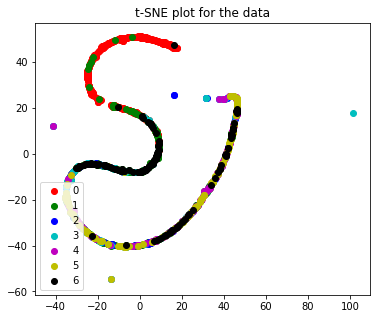

In [8]:
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [8]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [10]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 7
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

1002
334
6 dims
Building model...


In [12]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

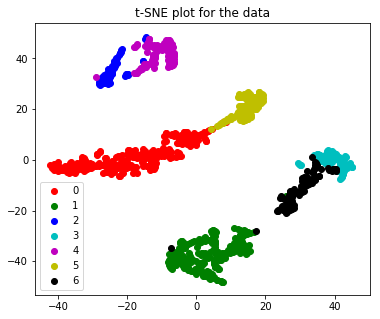

In [16]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2","3","4","5","6"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE_for_scaled.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

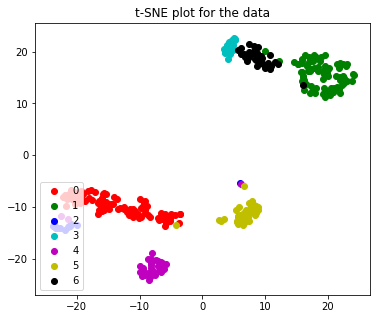

In [17]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2","3","4","5","6"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
#plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [13]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 2s 2ms/step - loss: 1.8793 - acc: 0.2864 - val_loss: 1.8197 - val_acc: 0.3054
Epoch 2/3000
1002/1002 [==============================] - 0s 76us/step - loss: 1.7516 - acc: 0.3074 - val_loss: 1.6803 - val_acc: 0.3054
Epoch 3/3000
1002/1002 [==============================] - 0s 84us/step - loss: 1.6052 - acc: 0.2994 - val_loss: 1.5287 - val_acc: 0.3263
Epoch 4/3000
1002/1002 [==============================] - 0s 75us/step - loss: 1.4514 - acc: 0.4351 - val_loss: 1.3771 - val_acc: 0.5449
Epoch 5/3000
1002/1002 [==============================] - 0s 72us/step - loss: 1.2959 - acc: 0.5419 - val_loss: 1.2230 - val_acc: 0.5659
Epoch 6/3000
1002/1002 [==============================] - 0s 71us/step - loss: 1.1449 - acc: 0.5778 - val_loss: 1.0809 - val_acc: 0.5808
Epoch 7/3000
1002/1002 [==============================] - 0s 80us/step - loss: 1.0157 - acc: 0.6008 - val_loss: 0.9652 - val_acc: 0.

1002/1002 [==============================] - 0s 60us/step - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0892 - val_acc: 0.9701
Epoch 61/3000
1002/1002 [==============================] - 0s 56us/step - loss: 0.0757 - acc: 0.9790 - val_loss: 0.0880 - val_acc: 0.9731
Epoch 62/3000
1002/1002 [==============================] - 0s 56us/step - loss: 0.0752 - acc: 0.9790 - val_loss: 0.0906 - val_acc: 0.9641
Epoch 63/3000
1002/1002 [==============================] - 0s 59us/step - loss: 0.0737 - acc: 0.9770 - val_loss: 0.0914 - val_acc: 0.9701
Epoch 64/3000
1002/1002 [==============================] - 0s 80us/step - loss: 0.0718 - acc: 0.9800 - val_loss: 0.0898 - val_acc: 0.9641
Epoch 65/3000
1002/1002 [==============================] - 0s 63us/step - loss: 0.0726 - acc: 0.9770 - val_loss: 0.0866 - val_acc: 0.9701
Epoch 66/3000
1002/1002 [==============================] - 0s 57us/step - loss: 0.0716 - acc: 0.9800 - val_loss: 0.0907 - val_acc: 0.9641
Epoch 67/3000
1002/1002 [=======================

1002/1002 [==============================] - 0s 76us/step - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0795 - val_acc: 0.9760
Epoch 120/3000
1002/1002 [==============================] - 0s 72us/step - loss: 0.0503 - acc: 0.9860 - val_loss: 0.0753 - val_acc: 0.9760
Epoch 121/3000
1002/1002 [==============================] - 0s 88us/step - loss: 0.0505 - acc: 0.9830 - val_loss: 0.0760 - val_acc: 0.9731
Epoch 122/3000
1002/1002 [==============================] - 0s 85us/step - loss: 0.0511 - acc: 0.9830 - val_loss: 0.0770 - val_acc: 0.9760
Epoch 123/3000
1002/1002 [==============================] - 0s 80us/step - loss: 0.0491 - acc: 0.9830 - val_loss: 0.0757 - val_acc: 0.9731
Epoch 124/3000
1002/1002 [==============================] - 0s 76us/step - loss: 0.0483 - acc: 0.9840 - val_loss: 0.0739 - val_acc: 0.9731
Epoch 125/3000
1002/1002 [==============================] - 0s 70us/step - loss: 0.0494 - acc: 0.9870 - val_loss: 0.0754 - val_acc: 0.9731
Epoch 126/3000
1002/1002 [================

In [14]:
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 39)                273       
_________________________________________________________________
activation_1 (Activation)    (None, 39)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1000      
_________________________________________________________________
activation_2 (Activation)    (None, 25)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 182       
_________________________________________________________________
activation_3 (Activation)    (None, 7)                 0         
Total params: 1,455
Trainable params: 1,455
Non-trainable params: 0
_________________________________________________________________


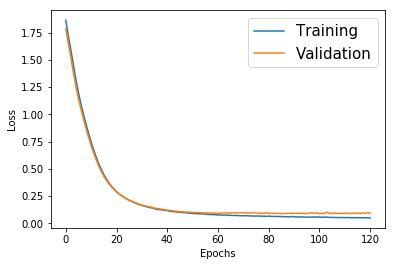

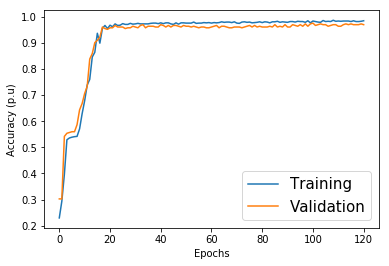

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
#plt.savefig('loss with adam.fig', format='eps', dpi=1000)
#plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
#plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
#plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [21]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/1500
1002/1002 [==============================] - 1s 821us/step - loss: 1.9257 - acc: 0.2924 - val_loss: 1.9059 - val_acc: 0.2994
Epoch 2/1500
1002/1002 [==============================] - 0s 71us/step - loss: 1.8897 - acc: 0.2924 - val_loss: 1.8665 - val_acc: 0.2994
Epoch 3/1500
1002/1002 [==============================] - 0s 89us/step - loss: 1.8554 - acc: 0.2924 - val_loss: 1.8309 - val_acc: 0.2994
Epoch 4/1500
1002/1002 [==============================] - 0s 96us/step - loss: 1.8293 - acc: 0.2924 - val_loss: 1.8023 - val_acc: 0.2994
Epoch 5/1500
1002/1002 [==============================] - 0s 88us/step - loss: 1.8097 - acc: 0.2924 - val_loss: 1.7853 - val_acc: 0.2994
Epoch 6/1500
1002/1002 [==============================] - 0s 90us/step - loss: 1.7990 - acc: 0.2924 - val_loss: 1.7731 - val_acc: 0.2994
Epoch 7/1500
1002/1002 [==============================] - ETA: 0s - loss: 1.7891 - acc: 0.298 - 0s 75us/step - loss: 1.7907 - acc:

Epoch 118/1500
1002/1002 [==============================] - 0s 42us/step - loss: 0.4751 - acc: 0.8423 - val_loss: 0.4602 - val_acc: 0.8473
Epoch 119/1500
1002/1002 [==============================] - 0s 47us/step - loss: 0.4692 - acc: 0.8463 - val_loss: 0.4568 - val_acc: 0.8503
Epoch 120/1500
1002/1002 [==============================] - 0s 62us/step - loss: 0.4637 - acc: 0.8433 - val_loss: 0.4522 - val_acc: 0.8503
Epoch 121/1500
1002/1002 [==============================] - 0s 47us/step - loss: 0.4593 - acc: 0.8423 - val_loss: 0.4484 - val_acc: 0.8503
Epoch 122/1500
1002/1002 [==============================] - 0s 47us/step - loss: 0.4540 - acc: 0.8453 - val_loss: 0.4445 - val_acc: 0.8503
Epoch 123/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.4488 - acc: 0.8463 - val_loss: 0.4398 - val_acc: 0.8533
Epoch 124/1500
1002/1002 [==============================] - 0s 44us/step - loss: 0.4448 - acc: 0.8453 - val_loss: 0.4354 - val_acc: 0.8533
Epoch 125/1500
1002/1002 [=

Epoch 177/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.1590 - acc: 0.9681 - val_loss: 0.1597 - val_acc: 0.9641
Epoch 178/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.1559 - acc: 0.9651 - val_loss: 0.1559 - val_acc: 0.9641
Epoch 179/1500
1002/1002 [==============================] - 0s 84us/step - loss: 0.1533 - acc: 0.9661 - val_loss: 0.1533 - val_acc: 0.9671
Epoch 180/1500
1002/1002 [==============================] - 0s 78us/step - loss: 0.1505 - acc: 0.9671 - val_loss: 0.1505 - val_acc: 0.9671
Epoch 181/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.1486 - acc: 0.9641 - val_loss: 0.1486 - val_acc: 0.9671
Epoch 182/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.1467 - acc: 0.9671 - val_loss: 0.1463 - val_acc: 0.9671
Epoch 183/1500
1002/1002 [==============================] - 0s 60us/step - loss: 0.1437 - acc: 0.9661 - val_loss: 0.1437 - val_acc: 0.9671
Epoch 184/1500
1002/1002 [=

Epoch 236/1500
1002/1002 [==============================] - 0s 69us/step - loss: 0.0880 - acc: 0.9741 - val_loss: 0.0833 - val_acc: 0.9701
Epoch 237/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.0873 - acc: 0.9741 - val_loss: 0.0840 - val_acc: 0.9731
Epoch 238/1500
1002/1002 [==============================] - 0s 69us/step - loss: 0.0870 - acc: 0.9721 - val_loss: 0.0827 - val_acc: 0.9701
Epoch 239/1500
1002/1002 [==============================] - 0s 69us/step - loss: 0.0871 - acc: 0.9731 - val_loss: 0.0816 - val_acc: 0.9701
Epoch 240/1500
1002/1002 [==============================] - 0s 43us/step - loss: 0.0868 - acc: 0.9731 - val_loss: 0.0824 - val_acc: 0.9701
Epoch 241/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0858 - acc: 0.9741 - val_loss: 0.0818 - val_acc: 0.9760
Epoch 242/1500
1002/1002 [==============================] - 0s 59us/step - loss: 0.0852 - acc: 0.9741 - val_loss: 0.0802 - val_acc: 0.9701
Epoch 243/1500
1002/1002 [=

Epoch 295/1500
1002/1002 [==============================] - 0s 83us/step - loss: 0.0702 - acc: 0.9741 - val_loss: 0.0654 - val_acc: 0.9701
Epoch 296/1500
1002/1002 [==============================] - 0s 113us/step - loss: 0.0704 - acc: 0.9760 - val_loss: 0.0642 - val_acc: 0.9701
Epoch 297/1500
1002/1002 [==============================] - 0s 108us/step - loss: 0.0698 - acc: 0.9780 - val_loss: 0.0646 - val_acc: 0.9731
Epoch 298/1500
1002/1002 [==============================] - 0s 78us/step - loss: 0.0696 - acc: 0.9760 - val_loss: 0.0647 - val_acc: 0.9701
Epoch 299/1500
1002/1002 [==============================] - 0s 86us/step - loss: 0.0697 - acc: 0.9760 - val_loss: 0.0647 - val_acc: 0.9701
Epoch 300/1500
1002/1002 [==============================] - 0s 83us/step - loss: 0.0697 - acc: 0.9760 - val_loss: 0.0643 - val_acc: 0.9731
Epoch 301/1500
1002/1002 [==============================] - 0s 94us/step - loss: 0.0690 - acc: 0.9760 - val_loss: 0.0640 - val_acc: 0.9701
Epoch 302/1500
1002/1002 

Epoch 354/1500
1002/1002 [==============================] - 0s 72us/step - loss: 0.0626 - acc: 0.9790 - val_loss: 0.0567 - val_acc: 0.9731
Epoch 355/1500
1002/1002 [==============================] - 0s 85us/step - loss: 0.0622 - acc: 0.9760 - val_loss: 0.0565 - val_acc: 0.9731
Epoch 356/1500
1002/1002 [==============================] - 0s 60us/step - loss: 0.0624 - acc: 0.9760 - val_loss: 0.0562 - val_acc: 0.9731
Epoch 357/1500
1002/1002 [==============================] - 0s 75us/step - loss: 0.0621 - acc: 0.9770 - val_loss: 0.0559 - val_acc: 0.9731
Epoch 358/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0627 - acc: 0.9770 - val_loss: 0.0557 - val_acc: 0.9731
Epoch 359/1500
1002/1002 [==============================] - 0s 66us/step - loss: 0.0623 - acc: 0.9780 - val_loss: 0.0556 - val_acc: 0.9731
Epoch 360/1500
1002/1002 [==============================] - 0s 61us/step - loss: 0.0618 - acc: 0.9780 - val_loss: 0.0561 - val_acc: 0.9760
Epoch 361/1500
1002/1002 [=

Epoch 413/1500
1002/1002 [==============================] - 0s 75us/step - loss: 0.0574 - acc: 0.9790 - val_loss: 0.0508 - val_acc: 0.9731
Epoch 414/1500
1002/1002 [==============================] - 0s 80us/step - loss: 0.0583 - acc: 0.9780 - val_loss: 0.0512 - val_acc: 0.9760
Epoch 415/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.0579 - acc: 0.9800 - val_loss: 0.0520 - val_acc: 0.9760
Epoch 416/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0583 - acc: 0.9780 - val_loss: 0.0513 - val_acc: 0.9731
Epoch 417/1500
1002/1002 [==============================] - 0s 78us/step - loss: 0.0576 - acc: 0.9780 - val_loss: 0.0511 - val_acc: 0.9731
Epoch 418/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.0579 - acc: 0.9780 - val_loss: 0.0506 - val_acc: 0.9731
Epoch 419/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.0580 - acc: 0.9750 - val_loss: 0.0508 - val_acc: 0.9731
Epoch 420/1500
1002/1002 [=

Epoch 472/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0543 - acc: 0.9790 - val_loss: 0.0471 - val_acc: 0.9760
Epoch 473/1500
1002/1002 [==============================] - 0s 58us/step - loss: 0.0556 - acc: 0.9760 - val_loss: 0.0482 - val_acc: 0.9760
Epoch 474/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.0546 - acc: 0.9790 - val_loss: 0.0470 - val_acc: 0.9760
Epoch 475/1500
1002/1002 [==============================] - 0s 67us/step - loss: 0.0546 - acc: 0.9790 - val_loss: 0.0475 - val_acc: 0.9760
Epoch 476/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.0545 - acc: 0.9820 - val_loss: 0.0472 - val_acc: 0.9790
Epoch 477/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.0547 - acc: 0.9780 - val_loss: 0.0478 - val_acc: 0.9731
Epoch 478/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.0548 - acc: 0.9790 - val_loss: 0.0471 - val_acc: 0.9760
Epoch 479/1500
1002/1002 [=

Epoch 531/1500
1002/1002 [==============================] - 0s 77us/step - loss: 0.0515 - acc: 0.9800 - val_loss: 0.0450 - val_acc: 0.9760
Epoch 532/1500
1002/1002 [==============================] - 0s 80us/step - loss: 0.0512 - acc: 0.9810 - val_loss: 0.0447 - val_acc: 0.9760
Epoch 533/1500
1002/1002 [==============================] - 0s 82us/step - loss: 0.0513 - acc: 0.9800 - val_loss: 0.0446 - val_acc: 0.9760
Epoch 534/1500
1002/1002 [==============================] - 0s 125us/step - loss: 0.0522 - acc: 0.9820 - val_loss: 0.0438 - val_acc: 0.9790
Epoch 535/1500
1002/1002 [==============================] - 0s 165us/step - loss: 0.0514 - acc: 0.9800 - val_loss: 0.0445 - val_acc: 0.9760
Epoch 536/1500
1002/1002 [==============================] - 0s 147us/step - loss: 0.0511 - acc: 0.9830 - val_loss: 0.0439 - val_acc: 0.9760
Epoch 537/1500
1002/1002 [==============================] - 0s 155us/step - loss: 0.0516 - acc: 0.9810 - val_loss: 0.0439 - val_acc: 0.9760
Epoch 538/1500
1002/100

Epoch 590/1500
1002/1002 [==============================] - 0s 86us/step - loss: 0.0493 - acc: 0.9840 - val_loss: 0.0420 - val_acc: 0.9820
Epoch 591/1500
1002/1002 [==============================] - 0s 69us/step - loss: 0.0478 - acc: 0.9830 - val_loss: 0.0410 - val_acc: 0.9820
Epoch 592/1500
1002/1002 [==============================] - 0s 61us/step - loss: 0.0494 - acc: 0.9820 - val_loss: 0.0418 - val_acc: 0.9820
Epoch 593/1500
1002/1002 [==============================] - 0s 92us/step - loss: 0.0479 - acc: 0.9820 - val_loss: 0.0418 - val_acc: 0.9790
Epoch 594/1500
1002/1002 [==============================] - 0s 76us/step - loss: 0.0481 - acc: 0.9840 - val_loss: 0.0414 - val_acc: 0.9820
Epoch 595/1500
1002/1002 [==============================] - 0s 74us/step - loss: 0.0484 - acc: 0.9820 - val_loss: 0.0420 - val_acc: 0.9790
Epoch 596/1500
1002/1002 [==============================] - 0s 75us/step - loss: 0.0479 - acc: 0.9820 - val_loss: 0.0412 - val_acc: 0.9820
Epoch 597/1500
1002/1002 [=

Epoch 649/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.0455 - acc: 0.9850 - val_loss: 0.0389 - val_acc: 0.9850
Epoch 650/1500
1002/1002 [==============================] - 0s 72us/step - loss: 0.0459 - acc: 0.9840 - val_loss: 0.0383 - val_acc: 0.9820
Epoch 651/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.0451 - acc: 0.9860 - val_loss: 0.0389 - val_acc: 0.9820
Epoch 652/1500
1002/1002 [==============================] - 0s 71us/step - loss: 0.0457 - acc: 0.9840 - val_loss: 0.0384 - val_acc: 0.9820
Epoch 653/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.0455 - acc: 0.9850 - val_loss: 0.0387 - val_acc: 0.9820
Epoch 654/1500
1002/1002 [==============================] - 0s 68us/step - loss: 0.0453 - acc: 0.9840 - val_loss: 0.0390 - val_acc: 0.9850
Epoch 655/1500
1002/1002 [==============================] - 0s 51us/step - loss: 0.0447 - acc: 0.9860 - val_loss: 0.0388 - val_acc: 0.9820
Epoch 656/1500
1002/1002 [=

Epoch 708/1500
1002/1002 [==============================] - 0s 77us/step - loss: 0.0420 - acc: 0.9850 - val_loss: 0.0366 - val_acc: 0.9850
Epoch 709/1500
1002/1002 [==============================] - 0s 76us/step - loss: 0.0419 - acc: 0.9860 - val_loss: 0.0376 - val_acc: 0.9820
Epoch 710/1500
1002/1002 [==============================] - 0s 48us/step - loss: 0.0424 - acc: 0.9850 - val_loss: 0.0361 - val_acc: 0.9850
Epoch 711/1500
1002/1002 [==============================] - 0s 61us/step - loss: 0.0424 - acc: 0.9850 - val_loss: 0.0368 - val_acc: 0.9820
Epoch 712/1500
1002/1002 [==============================] - 0s 53us/step - loss: 0.0420 - acc: 0.9860 - val_loss: 0.0366 - val_acc: 0.9850
Epoch 713/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0417 - acc: 0.9860 - val_loss: 0.0370 - val_acc: 0.9850
Epoch 714/1500
1002/1002 [==============================] - 0s 42us/step - loss: 0.0412 - acc: 0.9860 - val_loss: 0.0363 - val_acc: 0.9850
Epoch 715/1500
1002/1002 [=

Epoch 767/1500
1002/1002 [==============================] - 0s 65us/step - loss: 0.0386 - acc: 0.9870 - val_loss: 0.0351 - val_acc: 0.9850
Epoch 768/1500
1002/1002 [==============================] - 0s 59us/step - loss: 0.0384 - acc: 0.9870 - val_loss: 0.0349 - val_acc: 0.9850
Epoch 769/1500
1002/1002 [==============================] - 0s 70us/step - loss: 0.0378 - acc: 0.9860 - val_loss: 0.0351 - val_acc: 0.9850
Epoch 770/1500
1002/1002 [==============================] - 0s 52us/step - loss: 0.0381 - acc: 0.9860 - val_loss: 0.0349 - val_acc: 0.9850
Epoch 771/1500
1002/1002 [==============================] - 0s 85us/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0347 - val_acc: 0.9850
Epoch 772/1500
1002/1002 [==============================] - 0s 61us/step - loss: 0.0384 - acc: 0.9880 - val_loss: 0.0352 - val_acc: 0.9850
Epoch 773/1500
1002/1002 [==============================] - 0s 73us/step - loss: 0.0390 - acc: 0.9850 - val_loss: 0.0347 - val_acc: 0.9880
Epoch 774/1500
1002/1002 [=

In [22]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 1s 541us/step - loss: 1.8280 - acc: 0.3184 - val_loss: 1.7046 - val_acc: 0.2994
Epoch 2/3000
1002/1002 [==============================] - 0s 80us/step - loss: 1.6689 - acc: 0.3403 - val_loss: 1.5747 - val_acc: 0.5359
Epoch 3/3000
1002/1002 [==============================] - 0s 76us/step - loss: 1.5143 - acc: 0.5329 - val_loss: 1.3982 - val_acc: 0.5509
Epoch 4/3000
1002/1002 [==============================] - 0s 70us/step - loss: 1.3285 - acc: 0.5329 - val_loss: 1.2221 - val_acc: 0.5509
Epoch 5/3000
1002/1002 [==============================] - 0s 73us/step - loss: 1.1771 - acc: 0.5339 - val_loss: 1.0961 - val_acc: 0.5509
Epoch 6/3000
1002/1002 [==============================] - 0s 87us/step - loss: 1.0582 - acc: 0.5339 - val_loss: 0.9897 - val_acc: 0.5539
Epoch 7/3000
1002/1002 [==============================] - 0s 104us/step - loss: 0.9634 - acc: 0.5369 - val_loss: 0.8982 - val_acc:

Epoch 60/3000
1002/1002 [==============================] - 0s 55us/step - loss: 0.0845 - acc: 0.9711 - val_loss: 0.0769 - val_acc: 0.9641
Epoch 61/3000
1002/1002 [==============================] - 0s 50us/step - loss: 0.0828 - acc: 0.9721 - val_loss: 0.0848 - val_acc: 0.9671
Epoch 62/3000
1002/1002 [==============================] - 0s 40us/step - loss: 0.0815 - acc: 0.9671 - val_loss: 0.0783 - val_acc: 0.9611
Epoch 63/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0819 - acc: 0.9681 - val_loss: 0.0799 - val_acc: 0.9671
Epoch 64/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0785 - acc: 0.9741 - val_loss: 0.0877 - val_acc: 0.9671
Epoch 65/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0798 - acc: 0.9760 - val_loss: 0.0792 - val_acc: 0.9701
Epoch 66/3000
1002/1002 [==============================] - 0s 41us/step - loss: 0.0818 - acc: 0.9731 - val_loss: 0.0866 - val_acc: 0.9701
Epoch 67/3000
1002/1002 [=========

In [24]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 1s 718us/step - loss: 1.7960 - acc: 0.2934 - val_loss: 1.7030 - val_acc: 0.2994
Epoch 2/3000
1002/1002 [==============================] - 0s 81us/step - loss: 1.6666 - acc: 0.2924 - val_loss: 1.6068 - val_acc: 0.2994
Epoch 3/3000
1002/1002 [==============================] - 0s 75us/step - loss: 1.5776 - acc: 0.2974 - val_loss: 1.5192 - val_acc: 0.4192
Epoch 4/3000
1002/1002 [==============================] - 0s 74us/step - loss: 1.4760 - acc: 0.4790 - val_loss: 1.4060 - val_acc: 0.5449
Epoch 5/3000
1002/1002 [==============================] - 0s 72us/step - loss: 1.3590 - acc: 0.5309 - val_loss: 1.2917 - val_acc: 0.5539
Epoch 6/3000
1002/1002 [==============================] - 0s 75us/step - loss: 1.2440 - acc: 0.5379 - val_loss: 1.1810 - val_acc: 0.5569
Epoch 7/3000
1002/1002 [==============================] - 0s 74us/step - loss: 1.1307 - acc: 0.5399 - val_loss: 1.0776 - val_acc: 

1002/1002 [==============================] - 0s 75us/step - loss: 0.0714 - acc: 0.9790 - val_loss: 0.0907 - val_acc: 0.9731
Epoch 61/3000
1002/1002 [==============================] - 0s 81us/step - loss: 0.0710 - acc: 0.9750 - val_loss: 0.0870 - val_acc: 0.9611
Epoch 62/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0703 - acc: 0.9760 - val_loss: 0.0843 - val_acc: 0.9701
Epoch 63/3000
1002/1002 [==============================] - 0s 82us/step - loss: 0.0693 - acc: 0.9790 - val_loss: 0.0835 - val_acc: 0.9701
Epoch 64/3000
1002/1002 [==============================] - 0s 86us/step - loss: 0.0677 - acc: 0.9770 - val_loss: 0.0900 - val_acc: 0.9731
Epoch 65/3000
1002/1002 [==============================] - 0s 84us/step - loss: 0.0668 - acc: 0.9800 - val_loss: 0.0891 - val_acc: 0.9731
Epoch 66/3000
1002/1002 [==============================] - 0s 84us/step - loss: 0.0667 - acc: 0.9770 - val_loss: 0.0882 - val_acc: 0.9701
Epoch 67/3000
1002/1002 [=======================

In [25]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 1s 750us/step - loss: 1.7224 - acc: 0.2824 - val_loss: 1.5745 - val_acc: 0.3084
Epoch 2/3000
1002/1002 [==============================] - 0s 79us/step - loss: 1.4951 - acc: 0.4750 - val_loss: 1.3802 - val_acc: 0.5479
Epoch 3/3000
1002/1002 [==============================] - 0s 78us/step - loss: 1.3035 - acc: 0.5369 - val_loss: 1.2142 - val_acc: 0.5539
Epoch 4/3000
1002/1002 [==============================] - 0s 82us/step - loss: 1.1612 - acc: 0.5379 - val_loss: 1.1028 - val_acc: 0.5569
Epoch 5/3000
1002/1002 [==============================] - 0s 81us/step - loss: 1.0580 - acc: 0.5479 - val_loss: 1.0157 - val_acc: 0.5719
Epoch 6/3000
1002/1002 [==============================] - 0s 81us/step - loss: 0.9781 - acc: 0.5838 - val_loss: 0.9473 - val_acc: 0.5868
Epoch 7/3000
1002/1002 [==============================] - 0s 88us/step - loss: 0.9144 - acc: 0.6018 - val_loss: 0.8953 - val_acc: 

Epoch 60/3000
1002/1002 [==============================] - 0s 98us/step - loss: 0.1797 - acc: 0.9721 - val_loss: 0.1765 - val_acc: 0.9671
Epoch 61/3000
1002/1002 [==============================] - ETA: 0s - loss: 0.1767 - acc: 0.974 - 0s 95us/step - loss: 0.1773 - acc: 0.9721 - val_loss: 0.1741 - val_acc: 0.9671
Epoch 62/3000
1002/1002 [==============================] - 0s 113us/step - loss: 0.1753 - acc: 0.9721 - val_loss: 0.1721 - val_acc: 0.9671
Epoch 63/3000
1002/1002 [==============================] - 0s 107us/step - loss: 0.1727 - acc: 0.9711 - val_loss: 0.1702 - val_acc: 0.9671
Epoch 64/3000
1002/1002 [==============================] - 0s 84us/step - loss: 0.1706 - acc: 0.9691 - val_loss: 0.1679 - val_acc: 0.9671
Epoch 65/3000
1002/1002 [==============================] - 0s 85us/step - loss: 0.1687 - acc: 0.9711 - val_loss: 0.1655 - val_acc: 0.9671
Epoch 66/3000
1002/1002 [==============================] - 0s 55us/step - loss: 0.1668 - acc: 0.9691 - val_loss: 0.1635 - val_acc: 0

Epoch 177/3000
1002/1002 [==============================] - 0s 77us/step - loss: 0.0894 - acc: 0.9770 - val_loss: 0.0858 - val_acc: 0.9701
Epoch 178/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0891 - acc: 0.9760 - val_loss: 0.0857 - val_acc: 0.9701
Epoch 179/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0889 - acc: 0.9741 - val_loss: 0.0859 - val_acc: 0.9701
Epoch 180/3000
1002/1002 [==============================] - 0s 69us/step - loss: 0.0887 - acc: 0.9770 - val_loss: 0.0854 - val_acc: 0.9701
Epoch 181/3000
1002/1002 [==============================] - 0s 68us/step - loss: 0.0886 - acc: 0.9760 - val_loss: 0.0852 - val_acc: 0.9701
Epoch 182/3000
1002/1002 [==============================] - 0s 70us/step - loss: 0.0881 - acc: 0.9760 - val_loss: 0.0851 - val_acc: 0.9701
Epoch 183/3000
1002/1002 [==============================] - 0s 76us/step - loss: 0.0880 - acc: 0.9750 - val_loss: 0.0850 - val_acc: 0.9671
Epoch 184/3000
1002/1002 [=

Epoch 236/3000
1002/1002 [==============================] - 0s 80us/step - loss: 0.0794 - acc: 0.9770 - val_loss: 0.0769 - val_acc: 0.9701
Epoch 237/3000
1002/1002 [==============================] - 0s 74us/step - loss: 0.0791 - acc: 0.9770 - val_loss: 0.0768 - val_acc: 0.9701
Epoch 238/3000
1002/1002 [==============================] - 0s 71us/step - loss: 0.0790 - acc: 0.9770 - val_loss: 0.0764 - val_acc: 0.9701
Epoch 239/3000
1002/1002 [==============================] - 0s 75us/step - loss: 0.0789 - acc: 0.9780 - val_loss: 0.0763 - val_acc: 0.9701
Epoch 240/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0788 - acc: 0.9780 - val_loss: 0.0762 - val_acc: 0.9701
Epoch 241/3000
1002/1002 [==============================] - 0s 53us/step - loss: 0.0786 - acc: 0.9780 - val_loss: 0.0758 - val_acc: 0.9701
Epoch 242/3000
1002/1002 [==============================] - 0s 93us/step - loss: 0.0785 - acc: 0.9790 - val_loss: 0.0758 - val_acc: 0.9701
Epoch 243/3000
1002/1002 [=

Epoch 295/3000
1002/1002 [==============================] - 0s 82us/step - loss: 0.0733 - acc: 0.9790 - val_loss: 0.0709 - val_acc: 0.9701
Epoch 296/3000
1002/1002 [==============================] - 0s 88us/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.0710 - val_acc: 0.9701
Epoch 297/3000
1002/1002 [==============================] - 0s 83us/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.0708 - val_acc: 0.9701
Epoch 298/3000
1002/1002 [==============================] - 0s 79us/step - loss: 0.0730 - acc: 0.9780 - val_loss: 0.0712 - val_acc: 0.9701
Epoch 299/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.0711 - val_acc: 0.9701
Epoch 300/3000
1002/1002 [==============================] - 0s 70us/step - loss: 0.0729 - acc: 0.9770 - val_loss: 0.0708 - val_acc: 0.9701
Epoch 301/3000
1002/1002 [==============================] - 0s 77us/step - loss: 0.0727 - acc: 0.9780 - val_loss: 0.0707 - val_acc: 0.9701
Epoch 302/3000
1002/1002 [=

Epoch 354/3000
1002/1002 [==============================] - 0s 84us/step - loss: 0.0694 - acc: 0.9780 - val_loss: 0.0672 - val_acc: 0.9701
Epoch 355/3000
1002/1002 [==============================] - 0s 121us/step - loss: 0.0694 - acc: 0.9780 - val_loss: 0.0673 - val_acc: 0.9701
Epoch 356/3000
1002/1002 [==============================] - 0s 139us/step - loss: 0.0692 - acc: 0.9790 - val_loss: 0.0673 - val_acc: 0.9701
Epoch 357/3000
1002/1002 [==============================] - 0s 127us/step - loss: 0.0691 - acc: 0.9790 - val_loss: 0.0671 - val_acc: 0.9701
Epoch 358/3000
1002/1002 [==============================] - 0s 159us/step - loss: 0.0691 - acc: 0.9790 - val_loss: 0.0672 - val_acc: 0.9701
Epoch 359/3000
1002/1002 [==============================] - 0s 144us/step - loss: 0.0691 - acc: 0.9790 - val_loss: 0.0672 - val_acc: 0.9701
Epoch 360/3000
1002/1002 [==============================] - 0s 123us/step - loss: 0.0690 - acc: 0.9780 - val_loss: 0.0673 - val_acc: 0.9701
Epoch 361/3000
1002/1

Epoch 471/3000
1002/1002 [==============================] - 0s 90us/step - loss: 0.0645 - acc: 0.9790 - val_loss: 0.0630 - val_acc: 0.9701
Epoch 472/3000
1002/1002 [==============================] - 0s 138us/step - loss: 0.0644 - acc: 0.9790 - val_loss: 0.0628 - val_acc: 0.9701
Epoch 473/3000
1002/1002 [==============================] - 0s 166us/step - loss: 0.0642 - acc: 0.9780 - val_loss: 0.0626 - val_acc: 0.9671
Epoch 474/3000
1002/1002 [==============================] - 0s 138us/step - loss: 0.0642 - acc: 0.9790 - val_loss: 0.0629 - val_acc: 0.9671
Epoch 475/3000
1002/1002 [==============================] - 0s 155us/step - loss: 0.0643 - acc: 0.9790 - val_loss: 0.0627 - val_acc: 0.9671
Epoch 476/3000
1002/1002 [==============================] - 0s 158us/step - loss: 0.0642 - acc: 0.9790 - val_loss: 0.0630 - val_acc: 0.9701
Epoch 477/3000
1002/1002 [==============================] - 0s 144us/step - loss: 0.0644 - acc: 0.9780 - val_loss: 0.0629 - val_acc: 0.9671
Epoch 478/3000
1002/1

1002/1002 [==============================] - 0s 76us/step - loss: 0.0612 - acc: 0.9790 - val_loss: 0.0590 - val_acc: 0.9671
Epoch 589/3000
1002/1002 [==============================] - 0s 85us/step - loss: 0.0611 - acc: 0.9790 - val_loss: 0.0589 - val_acc: 0.9671
Epoch 590/3000
1002/1002 [==============================] - 0s 78us/step - loss: 0.0611 - acc: 0.9800 - val_loss: 0.0589 - val_acc: 0.9671
Epoch 591/3000
1002/1002 [==============================] - 0s 91us/step - loss: 0.0611 - acc: 0.9800 - val_loss: 0.0593 - val_acc: 0.9701
Epoch 592/3000
1002/1002 [==============================] - 0s 83us/step - loss: 0.0611 - acc: 0.9780 - val_loss: 0.0592 - val_acc: 0.9701
Epoch 593/3000
1002/1002 [==============================] - 0s 65us/step - loss: 0.0611 - acc: 0.9790 - val_loss: 0.0596 - val_acc: 0.9641
Epoch 594/3000
1002/1002 [==============================] - 0s 79us/step - loss: 0.0611 - acc: 0.9790 - val_loss: 0.0595 - val_acc: 0.9641
Epoch 595/3000
1002/1002 [================

Epoch 647/3000
1002/1002 [==============================] - 0s 54us/step - loss: 0.0598 - acc: 0.9800 - val_loss: 0.0580 - val_acc: 0.9671
Epoch 648/3000
1002/1002 [==============================] - 0s 62us/step - loss: 0.0599 - acc: 0.9790 - val_loss: 0.0579 - val_acc: 0.9671
Epoch 649/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0599 - acc: 0.9790 - val_loss: 0.0579 - val_acc: 0.9671
Epoch 650/3000
1002/1002 [==============================] - 0s 62us/step - loss: 0.0599 - acc: 0.9790 - val_loss: 0.0579 - val_acc: 0.9671
Epoch 651/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0598 - acc: 0.9800 - val_loss: 0.0580 - val_acc: 0.9671
Epoch 652/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0599 - acc: 0.9800 - val_loss: 0.0579 - val_acc: 0.9671
Epoch 653/3000
1002/1002 [==============================] - 0s 65us/step - loss: 0.0598 - acc: 0.9800 - val_loss: 0.0579 - val_acc: 0.9671
Epoch 654/3000
1002/1002 [=

Epoch 706/3000
1002/1002 [==============================] - 0s 72us/step - loss: 0.0587 - acc: 0.9800 - val_loss: 0.0574 - val_acc: 0.9671
Epoch 707/3000
1002/1002 [==============================] - 0s 72us/step - loss: 0.0588 - acc: 0.9790 - val_loss: 0.0572 - val_acc: 0.9671
Epoch 708/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0587 - acc: 0.9800 - val_loss: 0.0571 - val_acc: 0.9671
Epoch 709/3000
1002/1002 [==============================] - 0s 69us/step - loss: 0.0588 - acc: 0.9790 - val_loss: 0.0571 - val_acc: 0.9671
Epoch 710/3000
1002/1002 [==============================] - 0s 76us/step - loss: 0.0586 - acc: 0.9800 - val_loss: 0.0571 - val_acc: 0.9671
Epoch 711/3000
1002/1002 [==============================] - 0s 70us/step - loss: 0.0586 - acc: 0.9800 - val_loss: 0.0571 - val_acc: 0.9671
Epoch 712/3000
1002/1002 [==============================] - 0s 68us/step - loss: 0.0587 - acc: 0.9810 - val_loss: 0.0571 - val_acc: 0.9671
Epoch 713/3000
1002/1002 [=

Epoch 765/3000
1002/1002 [==============================] - 0s 77us/step - loss: 0.0578 - acc: 0.9800 - val_loss: 0.0561 - val_acc: 0.9671
Epoch 766/3000
1002/1002 [==============================] - 0s 78us/step - loss: 0.0578 - acc: 0.9800 - val_loss: 0.0563 - val_acc: 0.9671
Epoch 767/3000
1002/1002 [==============================] - 0s 60us/step - loss: 0.0577 - acc: 0.9800 - val_loss: 0.0565 - val_acc: 0.9671
Epoch 768/3000
1002/1002 [==============================] - 0s 69us/step - loss: 0.0578 - acc: 0.9800 - val_loss: 0.0563 - val_acc: 0.9671
Epoch 769/3000
1002/1002 [==============================] - 0s 58us/step - loss: 0.0577 - acc: 0.9810 - val_loss: 0.0562 - val_acc: 0.9671
Epoch 770/3000
1002/1002 [==============================] - 0s 68us/step - loss: 0.0577 - acc: 0.9800 - val_loss: 0.0561 - val_acc: 0.9671
Epoch 771/3000
1002/1002 [==============================] - 0s 78us/step - loss: 0.0577 - acc: 0.9800 - val_loss: 0.0561 - val_acc: 0.9671
Epoch 772/3000
1002/1002 [=

In [26]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 1s 820us/step - loss: 1.9007 - acc: 0.3144 - val_loss: 1.8217 - val_acc: 0.2994
Epoch 2/3000
1002/1002 [==============================] - 0s 121us/step - loss: 1.7961 - acc: 0.2924 - val_loss: 1.7277 - val_acc: 0.3054
Epoch 3/3000
1002/1002 [==============================] - 0s 122us/step - loss: 1.7037 - acc: 0.3234 - val_loss: 1.6226 - val_acc: 0.4641
Epoch 4/3000
1002/1002 [==============================] - 0s 125us/step - loss: 1.6037 - acc: 0.5110 - val_loss: 1.5171 - val_acc: 0.5509
Epoch 5/3000
1002/1002 [==============================] - 0s 119us/step - loss: 1.5020 - acc: 0.5329 - val_loss: 1.4172 - val_acc: 0.5509
Epoch 6/3000
1002/1002 [==============================] - 0s 127us/step - loss: 1.4050 - acc: 0.5329 - val_loss: 1.3226 - val_acc: 0.5509
Epoch 7/3000
1002/1002 [==============================] - 0s 127us/step - loss: 1.3137 - acc: 0.5329 - val_loss: 1.2383 - val

1002/1002 [==============================] - 0s 81us/step - loss: 0.0620 - acc: 0.9780 - val_loss: 0.0810 - val_acc: 0.9641
Epoch 119/3000
1002/1002 [==============================] - 0s 78us/step - loss: 0.0625 - acc: 0.9790 - val_loss: 0.0809 - val_acc: 0.9641
Epoch 120/3000
1002/1002 [==============================] - 0s 79us/step - loss: 0.0610 - acc: 0.9800 - val_loss: 0.0799 - val_acc: 0.9641
Epoch 121/3000
1002/1002 [==============================] - 0s 81us/step - loss: 0.0608 - acc: 0.9810 - val_loss: 0.0797 - val_acc: 0.9641
Epoch 122/3000
1002/1002 [==============================] - 0s 70us/step - loss: 0.0617 - acc: 0.9790 - val_loss: 0.0785 - val_acc: 0.9641
Epoch 123/3000
1002/1002 [==============================] - 0s 93us/step - loss: 0.0611 - acc: 0.9810 - val_loss: 0.0811 - val_acc: 0.9641
Epoch 124/3000
1002/1002 [==============================] - 0s 78us/step - loss: 0.0605 - acc: 0.9780 - val_loss: 0.0791 - val_acc: 0.9611
Epoch 125/3000
1002/1002 [================

In [28]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(7))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1002 samples, validate on 334 samples
Epoch 1/3000
1002/1002 [==============================] - 1s 833us/step - loss: 1.8967 - acc: 0.2655 - val_loss: 1.8003 - val_acc: 0.5389
Epoch 2/3000
1002/1002 [==============================] - 0s 91us/step - loss: 1.6576 - acc: 0.5279 - val_loss: 1.4974 - val_acc: 0.5509
Epoch 3/3000
1002/1002 [==============================] - 0s 84us/step - loss: 1.3639 - acc: 0.5329 - val_loss: 1.2186 - val_acc: 0.5539
Epoch 4/3000
1002/1002 [==============================] - 0s 85us/step - loss: 1.1315 - acc: 0.5329 - val_loss: 1.0424 - val_acc: 0.5539
Epoch 5/3000
1002/1002 [==============================] - 0s 84us/step - loss: 0.9810 - acc: 0.5379 - val_loss: 0.9141 - val_acc: 0.5569
Epoch 6/3000
1002/1002 [==============================] - 0s 90us/step - loss: 0.8472 - acc: 0.5878 - val_loss: 0.7829 - val_acc: 0.6826
Epoch 7/3000
1002/1002 [==============================] - 0s 96us/step - loss: 0.7269 - acc: 0.7315 - val_loss: 0.6639 - val_acc: 

1002/1002 [==============================] - 0s 51us/step - loss: 0.0689 - acc: 0.9770 - val_loss: 0.0672 - val_acc: 0.9760
Epoch 61/3000
1002/1002 [==============================] - 0s 62us/step - loss: 0.0683 - acc: 0.9721 - val_loss: 0.0632 - val_acc: 0.9731
Epoch 62/3000
1002/1002 [==============================] - 0s 62us/step - loss: 0.0674 - acc: 0.9741 - val_loss: 0.0651 - val_acc: 0.9731
Epoch 63/3000
1002/1002 [==============================] - 0s 47us/step - loss: 0.0681 - acc: 0.9780 - val_loss: 0.0639 - val_acc: 0.9760
Epoch 64/3000
1002/1002 [==============================] - 0s 62us/step - loss: 0.0674 - acc: 0.9790 - val_loss: 0.0641 - val_acc: 0.9701
Epoch 65/3000
1002/1002 [==============================] - 0s 73us/step - loss: 0.0664 - acc: 0.9770 - val_loss: 0.0647 - val_acc: 0.9731
Epoch 66/3000
1002/1002 [==============================] - 0s 68us/step - loss: 0.0667 - acc: 0.9760 - val_loss: 0.0619 - val_acc: 0.9760
Epoch 67/3000
1002/1002 [=======================

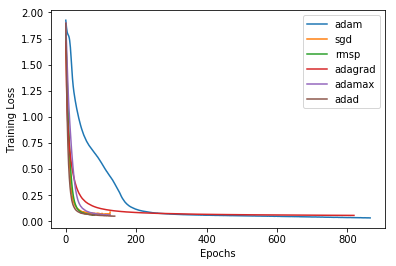

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

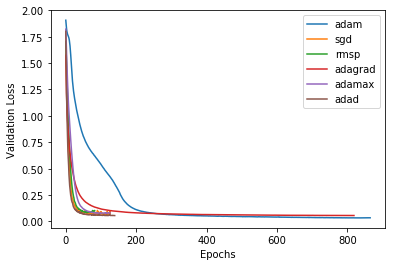

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

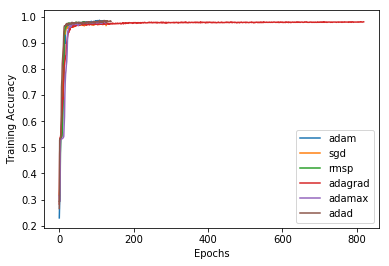

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

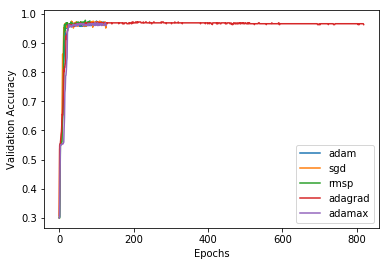

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)